In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [70]:
#Read in all the data, separated by commas
bowling_data = pd.read_csv('FinalData.data', sep= ',', header= None)

#X is all the angle values including the ball slope and velocity
#Y is the target value, X or O signifies strike or not strike respectively
X = bowling_data.values[:, 0:9]
Y = bowling_data.values[:,9]

#Split the dataset and train them
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=5, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)








DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [85]:
#clf_gini.predict([[20.58,162.86,132.32,145.21,154.23,163.29,124.96,45.81,1.2]])
clf_gini.predict([[131.92,158.49,171.26,154.12,176.32,164.32,151.67,66.31,4.25]])

array(['X'], dtype=object)

In [72]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  64.70588235294117


In [137]:
######################################################################
# KNN CLASSIFIER
# With current data, accuracy stops getting better after neighbors = 6
######################################################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [115]:
x_new = [[123.21,137.51,102.84,143.21,168.12,118.22,44.97,25.12,1.2145930441018318]]
y_predict = knn.predict(x_new)
print(y_predict[0])

O


{1: 0.47058823529411764, 2: 0.5882352941176471, 3: 0.5294117647058824, 4: 0.5882352941176471, 5: 0.5294117647058824, 6: 0.6470588235294118, 7: 0.5882352941176471, 8: 0.6470588235294118, 9: 0.5882352941176471, 10: 0.6470588235294118, 11: 0.6470588235294118, 12: 0.6470588235294118, 13: 0.6470588235294118, 14: 0.6470588235294118, 15: 0.6470588235294118, 16: 0.6470588235294118, 17: 0.6470588235294118, 18: 0.6470588235294118, 19: 0.6470588235294118, 20: 0.6470588235294118, 21: 0.6470588235294118, 22: 0.6470588235294118, 23: 0.6470588235294118, 24: 0.6470588235294118, 25: 0.6470588235294118, 26: 0.6470588235294118, 27: 0.6470588235294118, 28: 0.6470588235294118, 29: 0.6470588235294118}


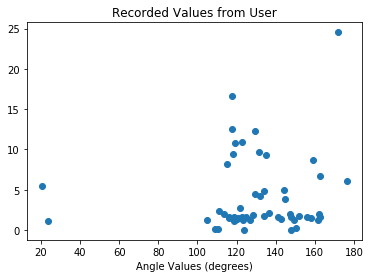

In [184]:
#Calculating the accuracies for knn
k_range=range(1,30)
scores = {}
scores_list= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
print(scores)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 8])
plt.title("Recorded Values from User")
plt.xlabel("Angle Values (degrees)")
plt.show()

In [166]:
import xlsxwriter 
  
workbook = xlsxwriter.Workbook('FinalData.xlsx') 
worksheet = workbook.add_worksheet() 
   
row = 0
column = 0
count = 0
i = 0
#Iterating through each possible combination to find out more strikes
for a in range(int(np.amin(bowling_data[2])), int(np.amax(bowling_data[2]))):
    for b in range(int(np.amin(bowling_data[5])), int(np.amax(bowling_data[5]))):
        #for c in range(int(np.amin(bowling_data[2])), int(np.amax(bowling_data[2]))):
        x_new=[[131.92,158.49,a,154.12,176.32,b,151.67,66.31,4.25]]
        y_predict = knn.predict(x_new)
        
        worksheet.write(row, column, str(x_new[0][0]))
        column += 1
        worksheet.write(row, column, str(x_new[0][1]))
        column += 1
        worksheet.write(row, column, str(x_new[0][2]))
        column += 1
        worksheet.write(row, column, str(x_new[0][3]))
        column += 1
        worksheet.write(row, column, str(x_new[0][4]))
        column += 1
        worksheet.write(row, column, str(x_new[0][5]))
        column += 1
        worksheet.write(row, column, str(x_new[0][6]))
        column += 1
        worksheet.write(row, column, str(x_new[0][7]))
        column += 1
        worksheet.write(row, column, str(x_new[0][8]))
        column += 1
        worksheet.write(row, column, str(y_predict[0]))
        column += 1
        row += 1
        column = 0
           
        #If there is a strike predicted, save these values in order to show the user    
        if (y_predict == 'X'):
            count+= 1
            a_best = a
            b_best = b
            c_best = x_new[0][2]
            d_best = x_new[0][3]
            e_best = x_new[0][4]
            f_best = x_new[0][5]
            g_best = x_new[0][6]
            h_best = x_new[0][7]
            i_best = x_new[0][8]
           
            
            
            
            
#Save the workbook
workbook.close()
print ("Strikes predicted: ", count)
print("In order to get a strike, you must: ")
#Right leg angle
if(x_new[0][0] > a_best):
    correct_angle = x_new[0][0] - a_best
    print("Decrease Right Leg Angle by: ", correct_angle)
if(x_new[0][0] < a_best):
    correct_angle = a_best - x_new[0][0]
    print("Increase Right Leg Angle by: ", correct_angle)
if(x_new[0][0] == a_best):
    correct_angle = a_best - x_new[0][0]
    print("Right Leg: Correct Angle")
    
#Left Leg angle    
if(x_new[0][1] > b_best):
    correct_angle = x_new[0][1] - b_best
    print("Decrease Left Leg Angle by: ", correct_angle)
if(x_new[0][1] < b_best):
    correct_angle = b_best - x_new[0][1]
    print("Increase Left Leg Angle by: ", correct_angle)
if(x_new[0][1] == b_best):
    correct_angle = b_best - x_new[0][1]
    print("Left leg: Correct Angle")
    
#Right arm angle    
if(x_new[0][2] > c_best):
    correct_angle = x_new[0][2] - c_best
    print("Decrease Right Arm Angle by: ", correct_angle)
if(x_new[0][2] < c_best):
    correct_angle = c_best - x_new[0][2]
    print("Increase Right Arm Angle by: ", correct_angle)
if(x_new[0][2] == c_best):
    correct_angle = c_best - x_new[0][2]
    print("Right arm: Correct Angle")

#Left arm angle
if(x_new[0][3] > d_best):
    correct_angle = x_new[0][3] - d_best
    print("Decrease Left Arm Angle by: ", correct_angle)
if(x_new[0][3] < d_best):
    correct_angle = d_best - x_new[0][3]
    print("Increase Left Arm Angle by: ", correct_angle)
if(x_new[0][3] == d_best):
    correct_angle = d_best - x_new[0][3]
    print("Left arm: Correct Angle")

#Back angle
if(x_new[0][4] > e_best):
    correct_angle = x_new[0][4] - e_best
    print("Decrease Back Angle by: ", correct_angle)
if(x_new[0][4] < e_best):
    correct_angle = e_best - x_new[0][4]
    print("Increase Back Angle by: ", correct_angle)
if(x_new[0][4] == e_best):
    correct_angle = e_best - x_new[0][4]
    print("Back: Correct Angle")

#Ball velocity
if(x_new[0][5] > f_best):
    correct_angle = x_new[0][5] - f_best
    print("Decrease Ball Velocity by: ", correct_angle)
if(x_new[0][5] < f_best):
    correct_angle = f_best - x_new[0][5]
    print("Increase Ball Velocity by: ", correct_angle)
if(x_new[0][5] == f_best):
    correct_angle = f_best - x_new[0][5]
    print("Ball Velocity: Correct")

#Rear foor angle
if(x_new[0][6] > g_best):
    correct_angle = x_new[0][6] - g_best
    print("Decrease Rear Foot Angle by: ", correct_angle)
if(x_new[0][6] < g_best):
    correct_angle = g_best - x_new[0][6]
    print("Increase Rear Foot Angle by: ", correct_angle)
if(x_new[0][6] == g_best):
    correct_angle = g_best - x_new[0][6]
    print("Rear foot: Correct Angle")

#Feet distance apart
if(x_new[0][7] > h_best):
    correct_angle = x_new[0][7] - h_best
    print("Decrease Feet Distance Apart by: ", correct_angle)
if(x_new[0][7] < h_best):
    correct_angle = h_best - x_new[0][7]
    print("Increase Feet Distance Apart by: ", correct_angle)
if(x_new[0][7] == h_best):
    correct_angle = h_best - x_new[0][7]
    print("Feet distance apart: Correct")

#Ball slope    
if(x_new[0][8] > i_best):
    correct_angle = x_new[0][8] - i_best
    print("Decrease Ball Slope by: ", correct_angle)
if(x_new[0][8] < i_best):
    correct_angle = i_best - x_new[0][8]
    print("Increase Ball Slope by: ", correct_angle)
if(x_new[0][8] == i_best):
    correct_angle = i_best - x_new[0][8]
    print("Ball slope: Correct")
    

Strikes predicted:  4027
In order to get a strike, you must: 
Increase Right Leg Angle by:  12.080000000000013
Increase Left Leg Angle by:  38.50999999999999
Decrease Right Arm Angle by:  33
Left arm: Correct Angle
Back: Correct Angle
Ball Velocity: Correct
Rear foot: Correct Angle
Feet distance apart: Correct
Ball slope: Correct
